In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [14]:
csv_file = "cleanedICPSR.csv"
df = pd.read_csv(csv_file)
df.head()

,Unnamed: 0,Race of Offender,Age at Execution,Name of Offender,Place of Execution,Jurisdiction of Exection,Crimes Committed,Method of Execution,Day,Month,Year,State,County,Sex,CountyName,StateName
0,0,White,,NORMAN ELI,2,4,01,Hanging,19,12,1812,1,89,NaN,Madison County,Alabama
1,1,White,,WOODS JOHN,4,6,44,Shot,06,02,1814,1,0,NaN,York city,Alabama
2,2,Black,,GAMARRA CHARLES,2,2,13,Hanging,19,05,1820,1,97,NaN,Mobile County,Alabama
3,3,Black,,DESAYAS VICTORIANO,2,2,01,Hanging,19,05,1820,1,97,NaN,Mobile County,Alabama
4,4,Black,,NOREAGO FRANCISCO,2,2,01,Hanging,30,05,1822,1,97,NaN,Mobile County,Alabama


In [15]:
#Clean Dataset for ML
df['Crimes Committed'].replace('  ', np.nan, inplace=True)
df = df[pd.notnull(df['Crimes Committed'])]
#df

,Unnamed: 0,Race of Offender,Age at Execution,Name of Offender,Place of Execution,Jurisdiction of Exection,Crimes Committed,Method of Execution,Day,Month,Year,State,County,Sex,CountyName,StateName
0,0,White,,NORMAN ELI,2,4,01,Hanging,19,12,1812,1,89,NaN,Madison County,Alabama
1,1,White,,WOODS JOHN,4,6,44,Shot,06,02,1814,1,0,NaN,York city,Alabama
2,2,Black,,GAMARRA CHARLES,2,2,13,Hanging,19,05,1820,1,97,NaN,Mobile County,Alabama
3,3,Black,,DESAYAS VICTORIANO,2,2,01,Hanging,19,05,1820,1,97,NaN,Mobile County,Alabama
4,4,Black,,NOREAGO FRANCISCO,2,2,01,Hanging,30,05,1822,1,97,NaN,Mobile County,Alabama
5,5,White,60,DAVIS THOMAS,2,2,39,Hanging,11,10,1822,1,125,NaN,Tuscaloosa County,Alabama
6,6,White,,WILSON HORATIO,2,2,01,Hanging,15,11,1822,1,71,NaN,Jackson County,Alabama
7,7,Black,,DAVY,2,2,15,Hanging,02,05,1823,1,47,NaN,Dallas County,Alabama
8,8,White,,BRIDEWELL WILLIAM,2,2,01,Hanging,24,10,1823,1,79,NaN,Lawrence County,Alabama
9,9,White,,LESTER EDMUND,2,2,01,Hanging,02,01,1824,1,89,NaN,Madison County,Alabama


In [19]:
df['Crimes Committed'] = df['Crimes Committed'].astype(int)

In [20]:
selected_features = df[['Crimes Committed', 'Year', 'State', 'County']]

In [21]:
selected_features.head()

,Crimes Committed,Year,State,County
0,1,1812,1,89
1,44,1814,1,0
2,13,1820,1,97
3,1,1820,1,97
4,1,1822,1,97
5,39,1822,1,125
6,1,1822,1,71
7,15,1823,1,47
8,1,1823,1,79
9,1,1824,1,89


In [41]:
dataset_array = selected_features.values
print(dataset_array.dtype)
print(dataset_array)

int64
[[   1 1812    1   89]
 [  44 1814    1    0]
 [  13 1820    1   97]
 ...
 [  11 2001   53   61]
 [  11 2000   54  183]
 [  26 1992   56    0]]


In [74]:
X = selected_features

In [75]:
# Create a kmeans model using k = 12
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12)

In [76]:
# Fit the model to the data
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [77]:
# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X)

In [78]:
# How to use this?

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values= np.nan, strategy= 'median')

imputer = imputer.fit(X.iloc[:, 1:4])
X = imputer.transform(X.iloc[:, 1:4])

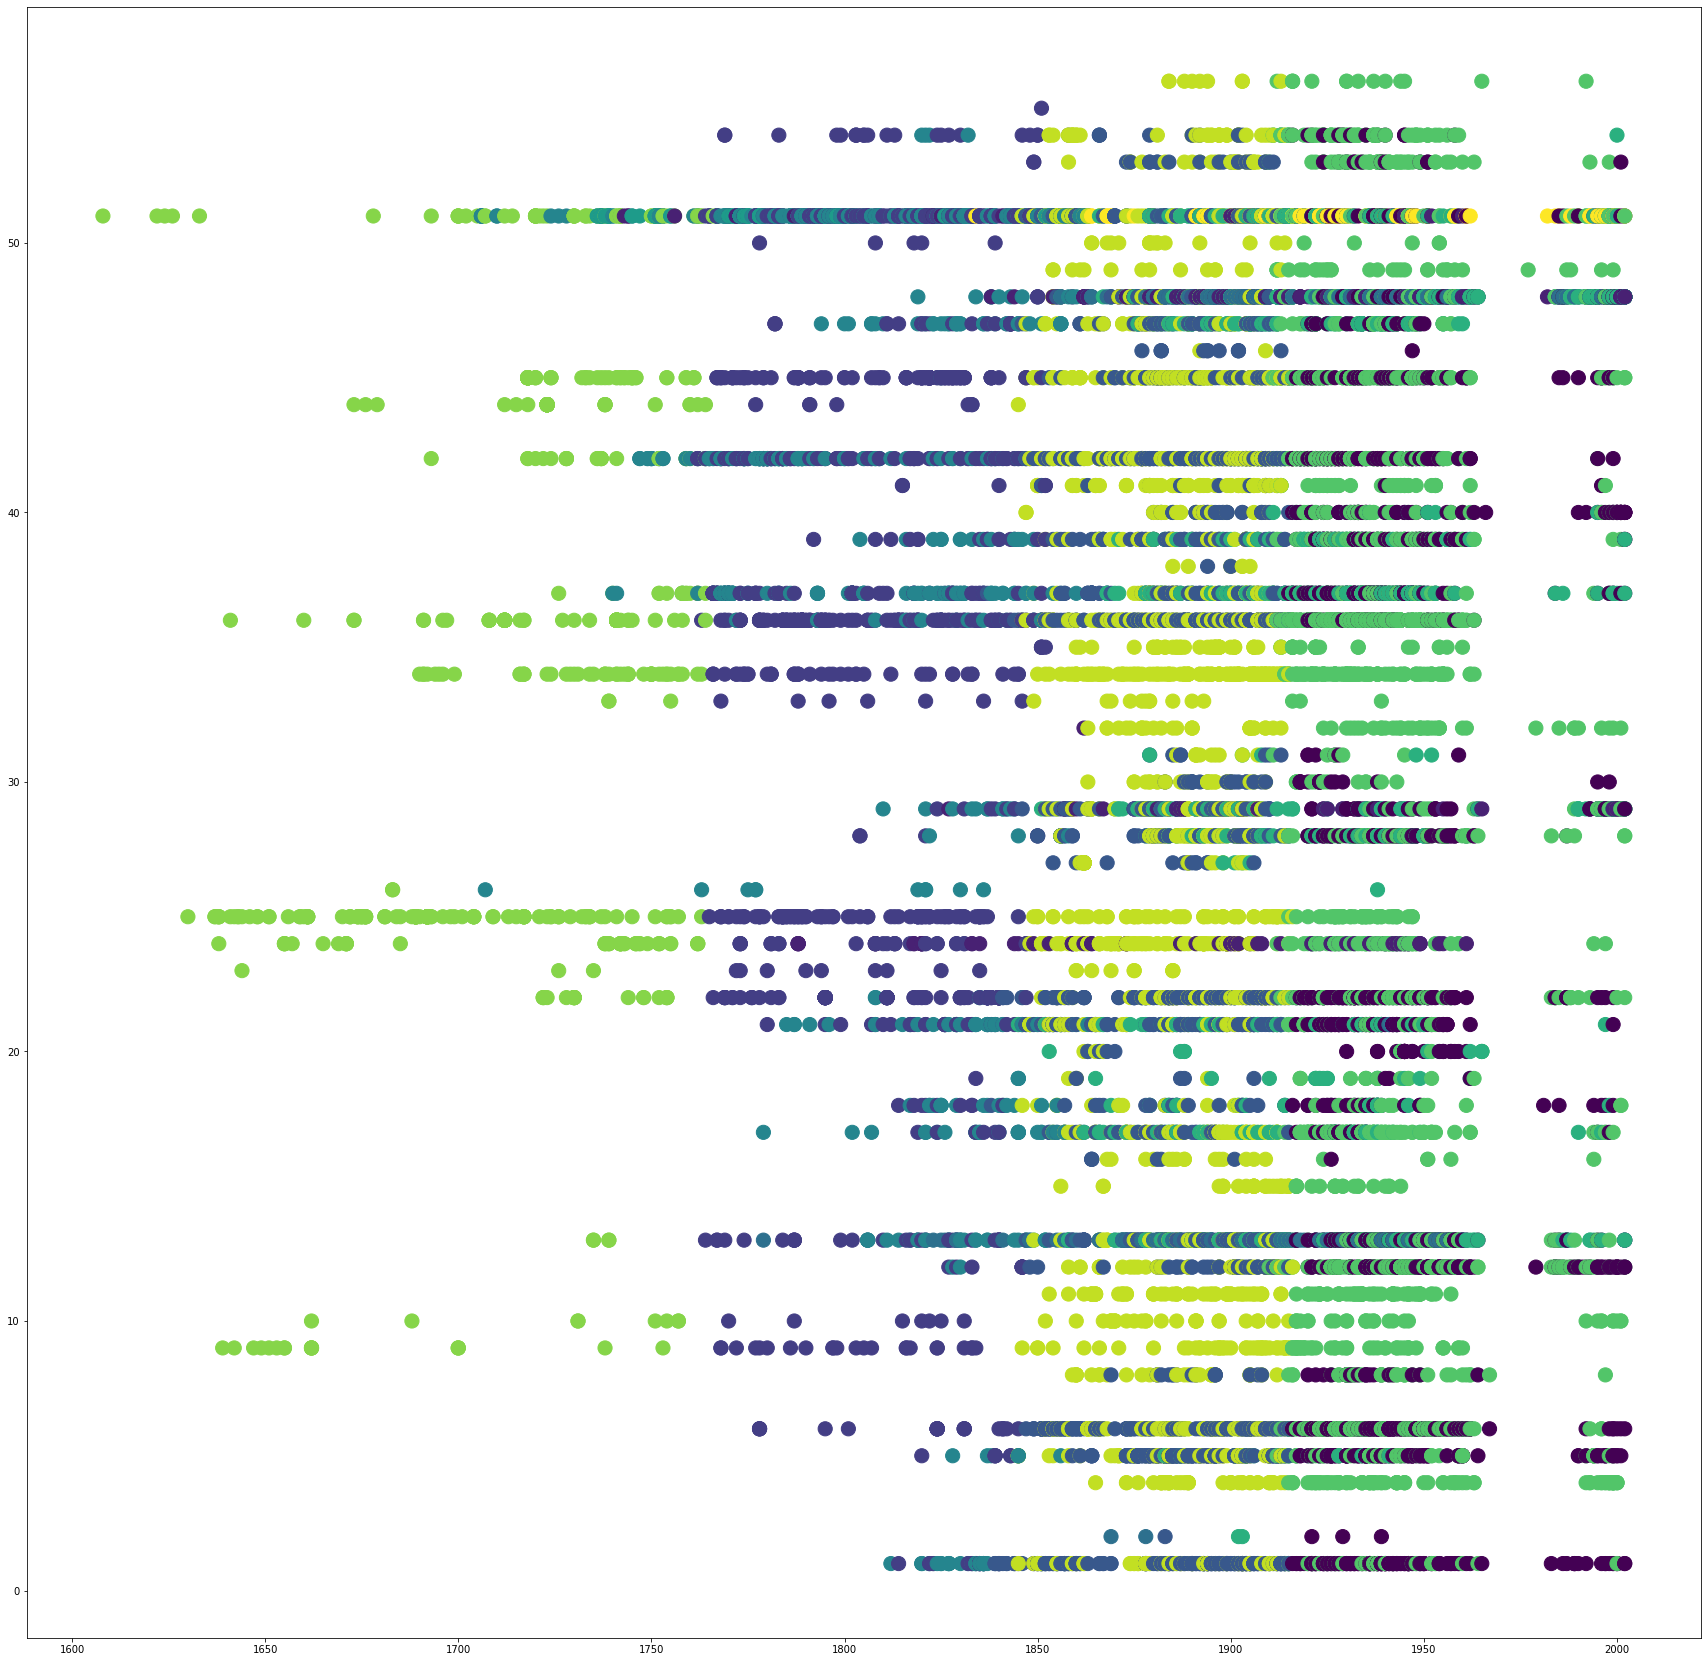

In [81]:
plt.figure(figsize=(30,30))
plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, s=200, cmap='viridis')